In [1]:
from google.colab import drive
!pip install bcolz
!pip install tushare
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/
     |████████████████████████████████| 1.5MB 2.8MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2666889 sha256=83ac71da9834314b20ddb4fddd91c377e2007742ec787c31733a2be042a488af
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
     |████████████████████████████████| 215kB 2.8MB/s 


In [2]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
import pandas as pd

from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error
import os
!mkdir /content/stockdata &&  tar -xzvf stockdata.tar.gz -C /content/stockdata


tar: Removing leading `/' from member names
/
.DS_Store
000638/
000638/__attrs__
000638/data/
000638/data/__0.blp
000638/data/__1.blp
000638/meta/
000638/meta/sizes
000638/meta/storage
000686/
000686/__attrs__
000686/data/
000686/data/__0.blp
000686/data/__1.blp
000686/meta/
000686/meta/sizes
000686/meta/storage
000728/
000728/__attrs__
000728/data/
000728/data/__0.blp
000728/data/__1.blp
000728/meta/
000728/meta/sizes
000728/meta/storage
000750/
000750/__attrs__
000750/data/
000750/data/__0.blp
000750/data/__1.blp
000750/meta/
000750/meta/sizes
000750/meta/storage
002144/
002144/__attrs__
002144/data/
002144/data/__0.blp
002144/data/__1.blp
002144/meta/
002144/meta/sizes
002144/meta/storage
002312/
002312/__attrs__
002312/data/
002312/data/__0.blp
002312/data/__1.blp
002312/meta/
002312/meta/sizes
002312/meta/storage
002489/
002489/__attrs__
002489/data/
002489/data/__0.blp
002489/data/__1.blp
002489/meta/
002489/meta/sizes
002489/meta/storage
002500/
002500/__attrs__
002500/data/
002

In [0]:


# !mkdir '/content/drive/My Drive/stockdata/'
!rm -rf /content/stockdata 
!mkdir /content/stockdata
!cd '/content/drive/My Drive/stockdata' && rm -f stockdata-x.tar.gz && wget http://fina.ouyanghome.com/stockdata-x.tar.gz && tar -xzvf stockdata-x.tar.gz -C /content/stockdata
!cd '/content/drive/My Drive/stockdata/' && tar -xzvf stockdata-x.tar.gz -C /content/stockdata

# !cd /content/stockdata  && tar -xzvf stockdata.tar.gz

#安装talib，以及运行环境
# !tar -xzvf predict.tar.gz
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib

# !pip install tushare
# !pip install baostock
# !pip install ta

# import tushare as ts
# import baostock as bs



In [0]:
os.chdir('/content/stockdata')


import matplotlib.pyplot as plt
import bcolz
# import newfeature
from keras.models import load_model

# import imp
# imp.reload(newfeature)

def getbaostock(symbol, start='2015-01-01', end='2019-10-25', ktype='D'):
    rs = bs.query_history_k_data_plus(symbol,
        "date,code,open,high,low,close,volume,amount",#turn,pctChg,peTTM,psTTM,pcfNcfTTM,pbMRQ,isST
        start_date=start, end_date=end,
        frequency=ktype, adjustflag="2")

    data_list = []
    while (rs.error_code == '0') & rs.next():
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    result=result[data['volume']>0].sort_values('date')
    result['p_change']=10*result.close.diff()/result.close.shift()
    result.set_index('date',inplace=True)
    
    return result  

def getcsvdata(symbol):
    path1='/content/stockdata/'
    # result = pd.read_csv(path1+symbol+'.csv')
    if os.path.exists(path1+symbol):

        columns=pd.read_csv(path1+'data.csv').columns
        save= bcolz.open(rootdir=path1+symbol, mode='a')
        result=pd.DataFrame(save,columns=columns[1:])

    if result.shape[0]>1 and result.shape[1]>200:
    # result=result[result['volume']>0].sort_values('date')
    # result['p_change']=10*result.close.diff()/result.close.shift()
        # result.set_index('date',inplace=True)

        data_y=0.1*result[['resultclass2','resultrelclass2','resultclass4','resultrelclass4','resultclass6','resultrelclass6','resultclass9','resultrelclass9']].values
        data_x=result.drop(['resultclass2','resultrelclass2','resultclass4','resultrelclass4','resultclass6','resultrelclass6','resultclass9','resultrelclass9'],axis=1)
        return data_x,data_y  
    else:
      return pd.DataFrame(),[]
  
def RMSE(orig, predictions):
    return sqrt(mean_squared_error(orig, predictions))
  
def get_quantiles(data,x=10): 
    bins=np.r_[-1e100,[np.round(np.quantile(data, i/x),3) for i in range(1,x)],1e100]
    return bins

##暂时没用
def predealData(data,szzs,days,binscount,r=1,isfeature=1,isrela=1):
    #如果是用talib、newfeatures计算的数据，需要解除前120条数据
    data.dropna(axis=0,inplace=True)
    data['amount']=0.25*(data.open+data.close+data.high+data.low)*data['volume']
    data_price=data.values
    data['result']=data['close'].shift(-days*r)/data['close']
#     print('result shape:',data['result'].dropna().shape,(szzs['close'].shift(-days*r)/szzs['close']).head(2))
    if isrela==1:
        data['result']=data['result']-szzs['close'].shift(-days*r)/szzs['close']
        data['szpctchg1']=40*szzs['close']/szzs['close'].shift(1)-40
        data['szpctchg2']=40*szzs['close']/szzs['close'].shift(2)-40
        data['szpctchg4']=40*szzs['close']/szzs['close'].shift(4)-40
        data['szpctchg8']=40*szzs['close']/szzs['close'].shift(8)-40
        data['szpctchg15']=40*szzs['close']/szzs['close'].shift(15)-40
        data['szpctchg30']=40*szzs['close']/szzs['close'].shift(30)-40
#     print('result shape:',data['result'].dropna().shape)
    #实际涨幅减去大盘涨幅，计算相对涨幅
    bins=get_quantiles(data['result'].dropna(),10)
    data['resultclass']=pd.cut(data['result'], bins, right=False,labels=False)
    data.dropna(inplace=True)
    if isfeature==0: 
    ###这是不用feature的操作
        start=0
        data_x=data[start:].drop(['result','resultclass','resultmaxclass','resultminclass','resultrelclass','p_change','price_change'],axis=1)


###下面是用features的操作
    elif isfeature==1: 
        start=120
        data=newfeature.getStockCharacter(data).astype('float16')
        data_x=data[start:].drop(['result','resultclass','resultclass','resultmaxclass','resultminclass','resultrelclass'],axis=1)
        
#         data_x=data[start:].drop(['v_ma5','v_ma10','v_ma20','result','resultclass','p_change','price_change'],axis=1)
#         data_x=data_x.drop(['ma5','ma10','ma20'],axis=1)
#     print(data_x.columns,data_x.head(2))
  
    data_y=0.1*data[start:][['resultclass','resultmaxclass','resultminclass','resultrelclass']].values
    y_price=data_price[::r][-100:]
    return y_price,data_x,data_y

  
def LSTMcutdatas(data_x,data_y,sequence_length,days,r=1,isfeature=1):
#生成LSTM程序
# r=int(240/int(dtype))，即一天包含多少个计时周期，如60分钟k线包含240/60=4

    newdata = []
    mm=15
#拼合成LSTM的结构

    for index in range(0,len(data_x) - sequence_length,r):

        rangedata=data_x[index: index + sequence_length]

### 这是用feature,什么都不用干
#         for ii in ['ma5','ma10','ma20']:
#             rangedata[[ii]]=(rangedata[[ii]])/(rangedata[[ii]].iloc[0])-1
#         rangedata['ma5']=(rangedata['ma5'])/(rangedata['ma5'][0])-1
#         rangedata['ma10']=(rangedata['ma10'])/(rangedata['ma10'][0])-1
#         rangedata['ma20']=(rangedata['ma20'])/(rangedata['ma20'][0])-1

# #这个是不用feature的操作
        if isfeature!=1:
            rangedata=(rangedata)/(rangedata.iloc[0])-1


        newdata.append(rangedata.values)

    newdata = np.array(newdata)
    
    x_train = newdata[:-100, :].astype('float16')
    x_test = newdata[-100:-10, :].astype('float16')
    x_pred = newdata[-10:, :].astype('float16')

    y_new=data_y[::r]
    y_train = y_new[int(sequence_length/r):-100]
    y_test = y_new[-100:-10]
    
    return x_train,x_test,x_pred,y_train,y_test

def ltsmmodel(xshape,yshape):
#创建模型
    from keras import optimizers

    from keras.models import Sequential
    from keras.layers import LSTM,Dense, Dropout, Flatten,Activation
    from keras.layers import Conv2D, MaxPooling2D
    from keras.layers.normalization import BatchNormalization

    model=Sequential()
    print(xshape)
    model.add(LSTM(units=1000,input_shape=(xshape[1],xshape[2]),return_sequences=True))  ##activation='softmax', 
    model.add(BatchNormalization())
    # model.add(Activation('tanh'))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=400,return_sequences=True))  ##activation='softmax', 
    # model.add(BatchNormalization())
    # model.add(Activation('tanh'))
    model.add(Dropout(0.3))

    # model.add(LSTM(units=200,return_sequences=True))  ##activation='softmax', 
    # model.add(BatchNormalization())
    # # model.add(Activation('tanh'))
    # model.add(Dropout(0.3))
    
    model.add(LSTM(units=100)), 
    model.add(Dropout(0.2))
    model.add(Dense(units=yshape[1]))
    model.add(Activation('linear'))

    sgd = optimizers.SGD(lr=0.01, clipnorm=1.,decay=1e-6, momentum=0.9, nesterov=True)
#     model.compile(loss='binary_crossentropy', optimizer=sgd)
    model.compile(optimizer='adam',loss='mean_absolute_error')#optimizer='adam',
    return model

def fitpredict(model,data):
    pass
    return RMSE(y_test[:-1], predictions[:-1]), predictions[-1][0]

def collectDatas(stocks,days,r,sequence_length):
    #将指数、所有数据拼合成一个collect
    j=0
    path1='/content/stockdata/'
    x_trains=pd.DataFrame()
    for symbol in stocks:
        if os.path.exists(path1+symbol):
            data_x,data_y=getcsvdata(symbol)
            # print(symbol,data_x.shape)

            #不同的数据获取方式
        #     data=ts.get_hist_data(symbol)
            # data=getbaostock(symbol)
        #     print(symbol,data.shape,szzs.head(2))

            if len(data_x)>300:
                j+=1
                # y_price,data_x,data_y=predealData(data,szzs,days,10,r,1)
                x_train,x_test,x_pred,y_train,y_test=LSTMcutdatas(data_x,data_y,sequence_length,days,r)
                if j%50==0:
                    print(j,symbol,data_x.shape)

                if x_train[np.isnan(x_train)].any():
                    print(j,'eerror', symbol,data_x.shape)
                elif data_x.shape[1]>200:
                    if j==1:
                        x_trains,x_tests,x_preds,y_trains,y_tests=x_train,x_test,x_pred,y_train,y_test
                    else:

                        x_trains=np.append(x_trains,x_train,axis=0)
                        y_trains=np.append(y_trains,y_train,axis=0)
                        x_tests=np.append(x_tests,x_test,axis=0)
                        y_tests=np.append(y_tests,y_test,axis=0)
                        x_preds=np.append(x_preds,x_pred,axis=0)

    if len(x_trains)>0:
        print(x_trains.shape)
        return x_trains,x_tests,x_preds,y_trains,y_tests
    else:
        print('no data')
        
        
        
def lstmpredict(model, x_trains,x_tests,x_preds,y_trains,y_tests, seq_len=50,epochs=30,days=5,r=1):
    #模型训练、并画图

    sequence_length=seq_len
    if len(x_trains)>300:

        history = model.fit(x_trains[:],y_trains[:],validation_data=(x_tests,y_tests)
           ,batch_size=128 * 2,epochs=epochs)
        #epochs=epochs,steps_per_epoch=30,validation_data=(x_tests,y_tests),validation_split=0.3
        predictions=model.predict(x_tests)        
        predictions_new=model.predict(x_preds)    


        plt.figure(figsize=(24,15))

        ax=plt.subplot(311)

        ax.plot(history.history['loss'])
        ax.plot(history.history['val_loss'])
        ax.legend(['train','validation'],loc='upper right')

        ax=plt.subplot(312)
        ax.plot(y_tests[-200:,0],c='g')
        ax.plot([0,200],[0.5,0.5],c='y')
        ax.plot(np.r_[predictions[-200:,0]],c='r')
        ax.legend(['true','predictions'],loc='upper right')

        
        

#         model.fit(x_tests[:],y_tests[:],
#             epochs=int(epochs/10),batch_size=128 * 2)
#         predictions=model.predict(x_tests)        
#         predictions_new=model.predict(x_preds)    


#         plt.figure(figsize=(24,15))
#         ax=plt.subplot(311)
#         ax.plot(y_tests[-100:],c='g')
#         ax.plot([0,100],[0.5,0.5],c='y')
#         ax.plot(np.r_[predictions[-100:],predictions_new[:]],c='r')

        return  1
        # return np.round(model.evaluate(x_tests, y_tests))
    else:
        return 'data too short',0


In [6]:
days=5
r=1
sequence_length=50
# # # stocks=['000001','000002','000005']
import tushare as ts
paths='/content/drive/My Drive/stockdata/'

stocks=ts.get_stock_basics().sort_index()
stocks.to_csv(paths+'stocks.csv')
stocks=stocks[stocks.index.str[:3]!='688'].index.values


['002608',
 '002670',
 '300059',
 '600643',
 '600881',
 '000686',
 '000728',
 '002144',
 '002500',
 '300007']

In [7]:

x_trains,x_tests,x_preds,y_trains,y_tests=collectDatas(stocks[:2],days,r,sequence_length)
print(x_trains.shape,y_trains.shape,)

# ##新建模型，如果模型不变，可以不需要
model=ltsmmodel(x_trains.shape,y_trains.shape)

## 如果是从drive中导入模型
# mp = "/content/drive/My Drive/model-271-400.h5"
# model=load_model(mp)


model.summary()
# print(x_trains.columns)
# !rm -f /content/000001.csv

(1002, 50, 284)
(1002, 50, 284) (1002, 8)

(1002, 50, 284)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



NameError: ignored

In [8]:
# for m in range(20,int(len(stocks)/50)):
#     x=m*50
#     y=(m+1)*50
#     x_trains,x_tests,x_preds,y_trains,y_tests=collectDatas(stocks[x:y],1,days,r,sequence_length)
#     print(x_trains.shape,x_tests.shape,y_trains.shape,y_tests.shape)

import tensorflow as tf

def get_Batch(data, label, batch_size):
    print(data.shape, label.shape)
    input_queue = tf.train.slice_input_producer([data, label], num_epochs=1, shuffle=True, capacity=32 ) 
    x_batch, y_batch = tf.train.batch(input_queue, batch_size=batch_size, num_threads=1, capacity=32, allow_smaller_final_batch=False)
    return x_batch, y_batch
    

 
datalen=1000
for m in range(0,1+int(len(stocks)/datalen)):
    x=m*datalen
    y=(m+1)*datalen
    # print(stocks[x:y])
    x_trains,x_tests,x_preds,y_trains,y_tests=collectDatas(stocks[x:y],days,r,sequence_length)
    print(x_trains.shape,x_tests.shape,y_trains.shape,y_tests.shape)



(22278, 50, 284)
(22278, 50, 284) (3330, 50, 284) (22278, 8) (3330, 8)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 22278 samples, validate on 400 samples
Epoch 1/50





22278/22278 [==============================] - 76s 3ms/step - loss: 0.2940 - val_loss: 0.2359
Epoch 2/50
22278/22278 [==============================] - 69s 3ms/step - loss: 0.2578 - val_loss: 0.2248
Epoch 3/50
22278/22278 [==============================] - 69s 3ms/step - loss: 0.2451 - val_loss: 0.2229
Epoch 4/50
22278/22278 [==============================] - 69s 3ms/step - loss: 0.2365 - val_loss: 0.2207
Epoch 5/50
22278/22278 [==============================] - 69s 3ms/step - loss: 0.2284 - val_loss: 0.2228
Epoch 6/50
22278/22278 [==============================] - 69s 3ms/step - loss: 0.2224 - val_loss: 0.2176
Epoch 7/50
22278/22278 [==============================] - 69s 3ms/step - loss: 0.2153 - val_loss: 0.2186
Epoch 8/50
22278/22278 [==============================] - 69s 3ms/step - loss: 0.2101 - val_loss: 0.2167
Epoch 9/50

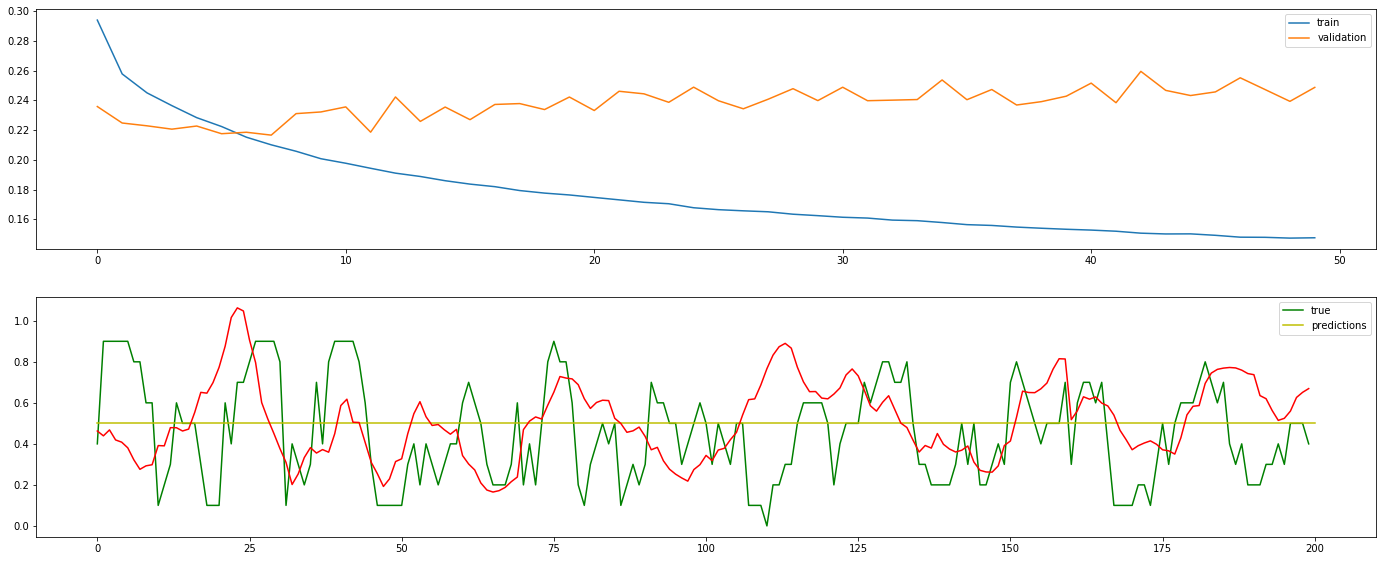

In [9]:

##如果模型不变，可以不需要下面的
# for m in range(10):
#     x_batch, y_batch = get_Batch(x_trains, y_trains, 100000)
absloss=lstmpredict(model,x_trains,x_tests,x_preds,y_trains,y_tests, 50,50,5,1)
mp = "/content/drive/My Drive/model-271-p4-cluster.h5"
drive.mount('/content/drive',force_remount=False)

model.save(mp)
    # print(rmse,absloss,predictresults)

In [0]:
# predictions=model.predict(x_tests)        
# predictions_new=model.predict(x_preds) 
plt.figure(figsize=(24,15))

for i in range(8):

    ax=plt.subplot('81'+str(i+1))
    ax.plot(y_tests[-300:,i],c='g')
    ax.plot([0,300],[0.5,0.5],c='y')
    ax.plot(np.r_[predictions[-300:,i]],c='r')
    print(i,',mean_absolute_error',mean_absolute_error(predictions[:,i],y_tests[:,i]))
    ax.legend(['true','predictions'],loc='upper right')
